<a href="https://colab.research.google.com/github/hikyle02/PolytechTest/blob/master/Mnist220922_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 0.2445 - accuracy: 0.9251
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1018 - accuracy: 0.9685
Epoch 3/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0741 - accuracy: 0.9776
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0603 - accuracy: 0.9822
Epoch 5/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0489 - accuracy: 0.9846
Epoch 6/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0375 - accuracy: 0.9889
Epoch 8/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0334 - accuracy: 0.9901
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0305 - accuracy: 0.9906
Epoch 10/10
313/313 [====

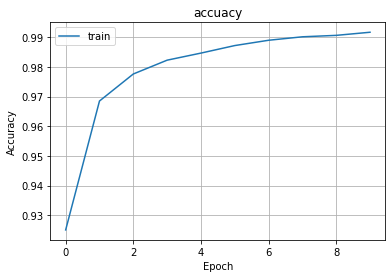

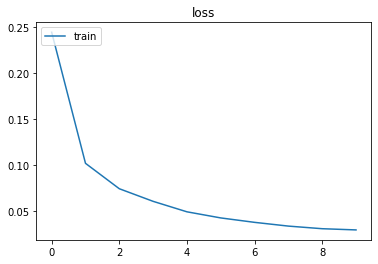

In [1]:
##MNIST 데이터의 신경망 적용
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
import matplotlib.pyplot as plt
#from keras.utils import to_categorical

# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 이미지 데이터 준비하기 (모델에 맞는 크기로 바꾸고 0과 1사이로 스케일링)
# train_images = train_images.reshape((60000, 28 * 28)) #테서모양 변환 : 2차원 -> 1차원
# train_images = train_images.astype('float32') / 255 # float32 데이터형으로 변환하고 [0,255] 범위를 [0,1] 범위로 정규화
# test_images = test_images.reshape((10000, 28 * 28))
# test_images = test_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# 레이블을 범주형으로 인코딩
train_labels = keras.utils.np_utils.to_categorical(train_labels) #레이블을 원핫 코드로 변환
test_labels = keras.utils.np_utils.to_categorical(test_labels)

# 모델 정의하기 (여기에서는 Sequential 클래스 사용)
model = models.Sequential()
# model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # 512: 은닉층 노드 개수,input_shape: 신경망의 입력층 노드 개수
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))  # 10: 출력층 노드 개수



# 모델 컴파일 하기 (compile 함수로 학습 준비)
model.compile(optimizer='rmsprop', # 또는 optimizer=Adam(learning_rate=0.001)
                loss='categorical_crossentropy',  #또는 loss='mean_squared_error'
                metrics=['accuracy'])

# fit() 메서드로 모델 훈련 시키기
# fit 함수로 실제 학습 수행(batch_size는 미니배치 크기, epochs는 최대 세대수, validation_data는 학습 도중에 사용할 검증 집합 설정)
# 학습 도중에 발생한 정보를 hist 객체에 저장(시각화에 활용)
hist=model.fit(train_images, train_labels,
               epochs=10, batch_size=128)#, )
               #verbose=1, validation_data=(test_images, test_labels))

#모델 저장  **********
model.save('trainedKerasModelMnist')

# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정답율 test_acc: ', test_acc, 'loss', test_loss)

print(hist.history)

plt.plot(hist.history['accuracy']) #매 epoch 마다 훈련의 정확도 

plt.title("accuacy")
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title("loss")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#https://cyc1am3n.github.io/2018/11/02/introduction-to-keras.html

In [2]:

!pip install opencv-python

from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


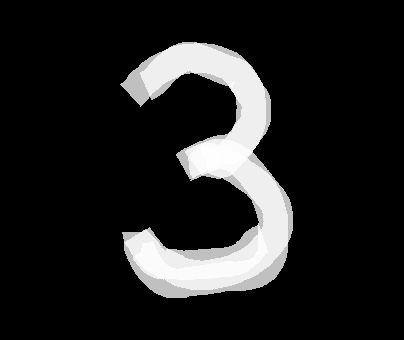

(28, 28)


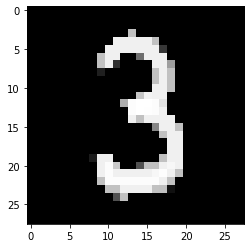

my_img (1, 784)
y_prob (1, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
The Answer is  [3]


In [3]:
#학습된 모델 불러오기 & 나의 숫자 predict.
from keras.models import load_model
model = load_model('trainedKerasModelMnist')
print(model.summary())
import cv2  #install opencv-python



my_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/SAM.png', cv2.IMREAD_UNCHANGED) #이미지 읽어옴

# #/content/drive/MyDrive/Colab Notebooks/3.png


my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY) #흑백으로 색깔바꿈
my_img = 255- my_img  #흑백 반전

cv2_imshow(my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

my_img = cv2.resize(my_img, (28,28)) #이미지 크기 변경 
print(my_img.shape)
import matplotlib.pyplot as plt
plt.imshow(my_img,'gray')
plt.show()

#my_img = my_img.astype('float32') / 255.
my_img = my_img.reshape((-1,28*28)) #.astype('float32') / 255

print("my_img", my_img.shape)

y_prob = model.predict(my_img)

print("y_prob" , y_prob.shape)

print(y_prob)

pred = y_prob.argmax(axis=-1)



print("The Answer is ", pred)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


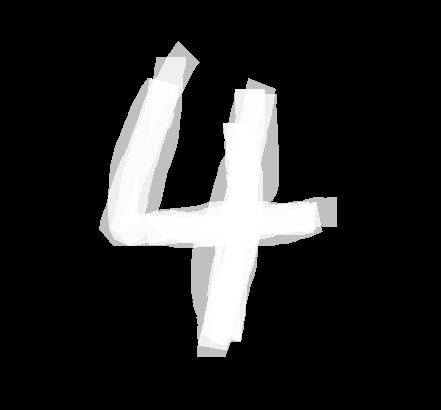

(28, 28)


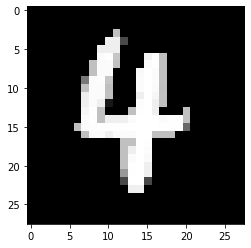

my_img (1, 784)
y_prob (1, 10)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
The Answer is  [4]


In [ ]:
#학습된 모델 불러오기 & 나의 숫자 predict.
from keras.models import load_model
model = load_model('trainedKerasModelMnist')
print(model.summary())
import cv2  #install opencv-python



my_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/four.png', cv2.IMREAD_UNCHANGED) #이미지 읽어옴

# #/content/drive/MyDrive/Colab Notebooks/3.png


my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY) #흑백으로 색깔바꿈
my_img = 255- my_img  #흑백 반전

cv2_imshow(my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

my_img = cv2.resize(my_img, (28,28)) #이미지 크기 변경 
print(my_img.shape)
import matplotlib.pyplot as plt
plt.imshow(my_img,'gray')
plt.show()

#my_img = my_img.astype('float32') / 255.
my_img = my_img.reshape((-1,28*28)) #.astype('float32') / 255

print("my_img", my_img.shape)

y_prob = model.predict(my_img)

print("y_prob" , y_prob.shape)

print(y_prob)

pred = y_prob.argmax(axis=-1)



print("The Answer is ", pred)